In [1]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import named_colors, mpl_loc, fancy_legend, load_mpl_presets
import numpy as np
import math as m
import vice
import sys
load_mpl_presets()
print(sys.version_info)

sys.version_info(major=3, minor=10, micro=2, releaselevel='final', serial=0)


/Users/astrobeard/Work/Research/VICErepos/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


# How do the predictions of the two-infall model change when the time of onset of the second infall episode varies?

In [2]:
path = "/Volumes/Elements/bimodality-outputs/twoinfall/post-process"
names = [
    "%s/tau1_1_tau2_4_onset_2" % (path),
    "%s/tau1_1_tau2_4_onset_4" % (path),
    "%s/tau1_1_tau2_4_onset_6" % (path)
]
outputs = [vice.output(_) for _ in names]
for i in range(len(outputs)):
    extra = np.genfromtxt("%s_analogdata.out" % (outputs[i].name))
    outputs[i].stars["abszfinal"] = [row[-1] for row in extra[:outputs[i].stars.size[0]]]

# The infall and star formation histories of these models

In the model with $t_\text{delay} = 2$ Gyr, the SFR barely declines between the infall episodes, whereas it drops by $\sim$1 and $\sim$1.5 dex when $t_\text{delay} = 4$ and 6 Gyr, respectively

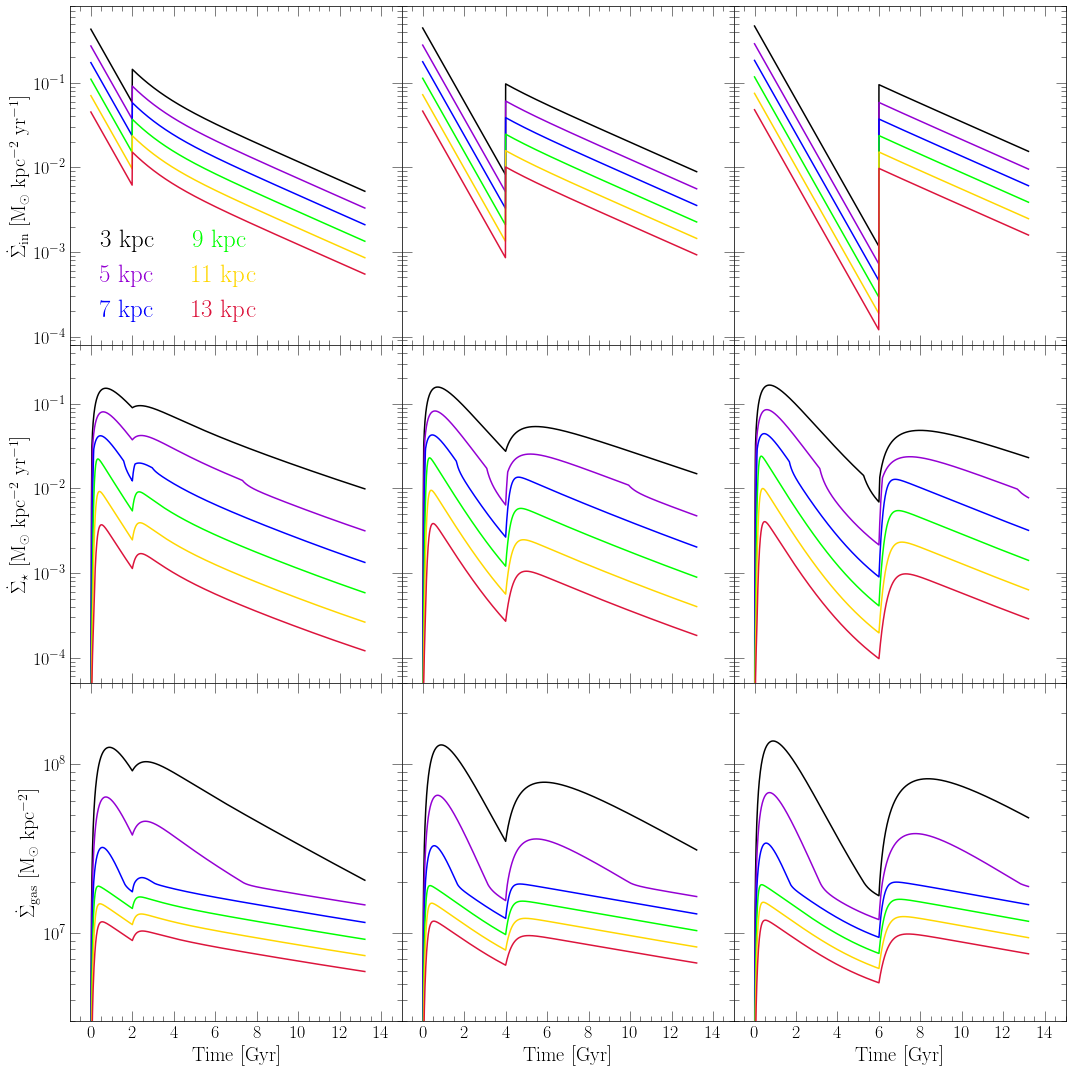

In [3]:
fig = plt.figure(figsize = (15, 15))
axes = [[], [], []]
ylabels = [
    r"$\dot{\Sigma}_\text{in}$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]",
    r"$\dot{\Sigma}_\star$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]",
    r"$\dot{\Sigma}_\text{gas}$ [M$_\odot$ kpc$^{-2}$]"
]
ylim = [[8.e-5, 0.8], [5.e-5, 5.e-1], [3.e6, 3.e8]]
for i in range(len(axes)):
    for j in range(3):
        axes[i].append(fig.add_subplot(331 + 3 * i + j))
        axes[i][j].set_yscale("log")
        axes[i][j].set_xlim([-1, 15])
        axes[i][j].set_ylim(ylim[i])
        axes[i][j].set_xticks([0, 2, 4, 6, 8, 10, 12, 14])
        if j == 0:
            axes[i][j].set_ylabel(ylabels[i])
        else:
            plt.setp(axes[i][j].get_yticklabels(), visible = False)
        if i == len(axes) - 1: axes[i][j].set_xlabel("Time [Gyr]")

zones = ["zone30", "zone50", "zone70", "zone90", "zone110", "zone130"]
colors = ["black", "darkviolet", "blue", "lime", "gold", "crimson"]
radii = [3, 5, 7, 9, 11, 13]
zone_width = 0.1

for i in range(len(outputs)):
    xvals = outputs[i].zones[zones[0]].history["time"]
    for j in range(len(zones)):
        kwargs = {
            "c": named_colors()[colors[j]]
        }
        if not i: kwargs["label"] = "%g kpc" % (radii[j])
        area = m.pi * ((radii[j] + zone_width)**2 - radii[j]**2)
        yvals = outputs[i].zones[zones[j]].history["ifr"]
        yvals = [_ / area for _ in yvals]
        axes[0][i].plot(xvals, yvals, **kwargs)
        yvals = outputs[i].zones[zones[j]].history["sfr"]
        yvals = [_ / area for _ in yvals]
        axes[1][i].plot(xvals, yvals, **kwargs)
        yvals = outputs[i].zones[zones[j]].history["mgas"]
        yvals = [_ / area for _ in yvals]
        axes[2][i].plot(xvals, yvals, **kwargs)
        
kwargs = {
    "loc": mpl_loc("lower left"),
    "ncol": 2,
    "frameon": False,
    "handlelength": 0,
    "fontsize": 25,
    "columnspacing": 1.2
}
leg = axes[0][0].legend(**kwargs)
fancy_legend(leg, colors)

plt.tight_layout()
plt.subplots_adjust(wspace = 0, hspace = 0)
for ext in ["pdf", "png"]: plt.savefig("./twoinfall_timescales/sfh_tdelay_var.%s" % (ext))
plt.show()

# The gas-phase tracks

As can be seen in the figure below, for longer $t_\text{delay}$, the "hooks" characteristic of the two-ifnall model's evolution through the [$\alpha$/Fe]-[Fe/H] plane start at lower [$\alpha$/Fe]. This result arises out of the monotonic decrease in [$\alpha$/Fe] with time prior to the onset of the second infall event. Furthermore, as the SFR and the gas supply fall off, SN Ia enrich an ISM that is gas-starved relative to when they formed, enhancing this impact on [Fe/H] and consequently [$\alpha$/Fe].

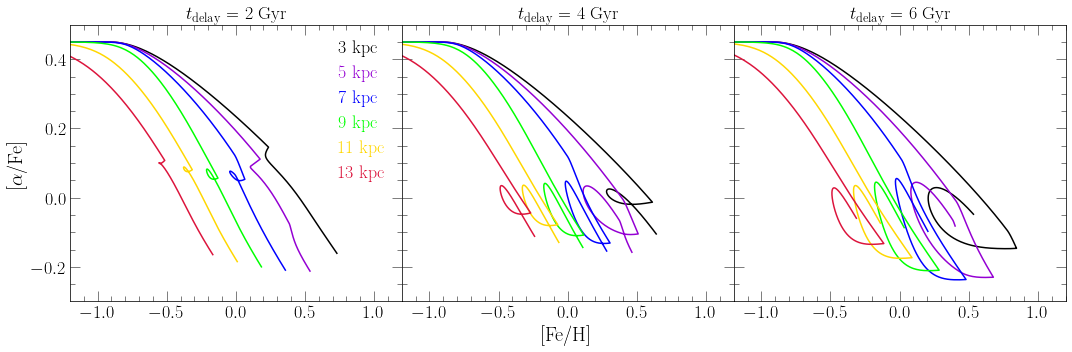

In [4]:
fig = plt.figure(figsize = (15, 5))
axes = []
titles = [r"$t_\text{delay}$ = %d Gyr" % (_) for _ in [2, 4, 6]]
for i in range(3):
    axes.append(fig.add_subplot(131 + i))
    axes[i].set_xlim([-1.2, 1.2])
    axes[i].set_ylim([-0.3, 0.5])
    axes[i].set_title(titles[i])
    if i == 0: 
        axes[i].set_ylabel(r"[$\alpha$/Fe]")
    else:
        plt.setp(axes[i].get_yticklabels(), visible = False)
    if i == 1: axes[i].set_xlabel("[Fe/H]")

# out = outputs[2]

zones = ["zone30", "zone50", "zone70", "zone90", "zone110", "zone130"]
labels = ["3 kpc", "5 kpc", "7 kpc", "9 kpc", "11 kpc", "13 kpc"]
colors = ["black", "darkviolet", "blue", "lime", "gold", "crimson"]


for i in range(len(outputs)):
    for j in range(len(zones)):
        xvals = outputs[i].zones[zones[j]].history["[fe/h]"]
        yvals = outputs[i].zones[zones[j]].history["[o/fe]"]
        kwargs = {
            "c": named_colors()[colors[j]]
        }
        if not i: kwargs["label"] = labels[j]
        axes[i].plot(xvals, yvals, **kwargs)
        
kwargs = {
    "loc": mpl_loc("upper right"),
    "ncol": 1,
    "frameon": False,
    "handlelength": 0
}
leg = axes[0].legend(**kwargs)
fancy_legend(leg, colors)
    
plt.tight_layout()
plt.subplots_adjust(wspace = 0)
for ext in ["pdf", "png"]: plt.savefig("./twoinfall_timescales/tracks_tdelay_var.%s" % (ext))
plt.show()

# Is this noticeable in the stellar distribution, particularly with age information thrown in?

For the sake of this calculation, we'll zone in on a 2-kpc wide range in radius, and within 0.5 kpc of the midplane.

/var/folders/1p/lm_h7y810f9_7ygnvr2tjc_w0000gn/T/ipykernel_42733/2006854379.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


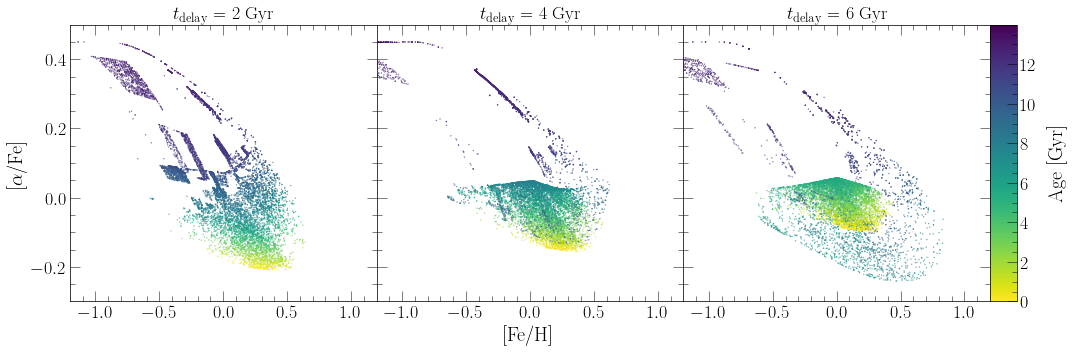

In [6]:
fig = plt.figure(figsize = (15, 5))
axes = []
titles = [r"$t_\text{delay}$ = %d Gyr" % (_) for _ in [2, 4, 6]]
for i in range(3):
    axes.append(fig.add_subplot(131 + i))
    axes[i].set_xlim([-1.2, 1.2])
    axes[i].set_ylim([-0.3, 0.5])
    axes[i].set_title(titles[i])
    if i == 0: 
        axes[i].set_ylabel(r"[$\alpha$/Fe]")
    else:
        plt.setp(axes[i].get_yticklabels(), visible = False)
    if i == 1:
        axes[i].set_xlabel("[Fe/H]")

zone_bounds = [70, 89]
stars = []
for i in range(len(outputs)):
    stars.append(outputs[i].stars.filter(
        "zone_final", ">=", zone_bounds[0]).filter(
        "zone_final", "<=", zone_bounds[1]).filter(
        "abszfinal", "<=", 0.5))
    
for i in range(len(outputs)):
    np.random.seed(seed = 0)
    mtot = sum(stars[i]["mass"])
    mass_fracs = [_ / mtot for _ in stars[i]["mass"]]
    indeces = np.random.choice(list(range(len(stars[i]["mass"]))), p = mass_fracs,
        size = 10000)
    xvals = [stars[i]["[fe/h]"][_] for _ in indeces]
    yvals = [stars[i]["[o/fe]"][_] for _ in indeces]
    age = [stars[i]["age"][_] for _ in indeces]
    kwargs = {
        "c": age,
        "s": 0.1,
        "rasterized": True,
        "cmap": plt.get_cmap("viridis_r"),
        "vmin": 0,
        "vmax": 14
    }
    sc = axes[i].scatter(xvals, yvals, **kwargs)
    
cbar_ax = fig.add_axes([0.92, 0.05, 0.02, 0.95])
cbar = plt.colorbar(sc, cax = cbar_ax, pad = 0, orientation = "vertical")
cbar.set_label("Age [Gyr]", labelpad = 10)
cbar.set_ticks(range(0, 14, 2))

plt.tight_layout()
plt.subplots_adjust(hspace = 0, wspace = 0, right = 0.92)
cbar_ax.set_position([
    axes[-1].get_position().x1,
    axes[-1].get_position().y0,
    0.025,
    axes[-1].get_position().y1 - axes[-1].get_position().y0
])
for ext in ["pdf", "png"]: plt.savefig("./twoinfall_timescales/afe_feh_stars_tdelay_var.%s" % (ext))
plt.show()

# How do the two-infall model predictions change when the e-folding timescale of the second infall episode varies?

In [2]:
path = "/Volumes/Elements/bimodality-outputs/twoinfall/post-process"
names = [
    "%s/tau1_1_tau2_2_onset_4" % (path),
    "%s/tau1_1_tau2_4_onset_4" % (path),
    "%s/tau1_1_tau2_6_onset_4" % (path)
]
outputs = [vice.output(_) for _ in names]
for i in range(len(outputs)):
    extra = np.genfromtxt("%s_analogdata.out" % (outputs[i].name))
    outputs[i].stars["abszfinal"] = [row[-1] for row in extra[:outputs[i].stars.size[0]]]

# The infall and star formation histories

By design, the SFH declines more sharply in the models with lower $\tau_2$

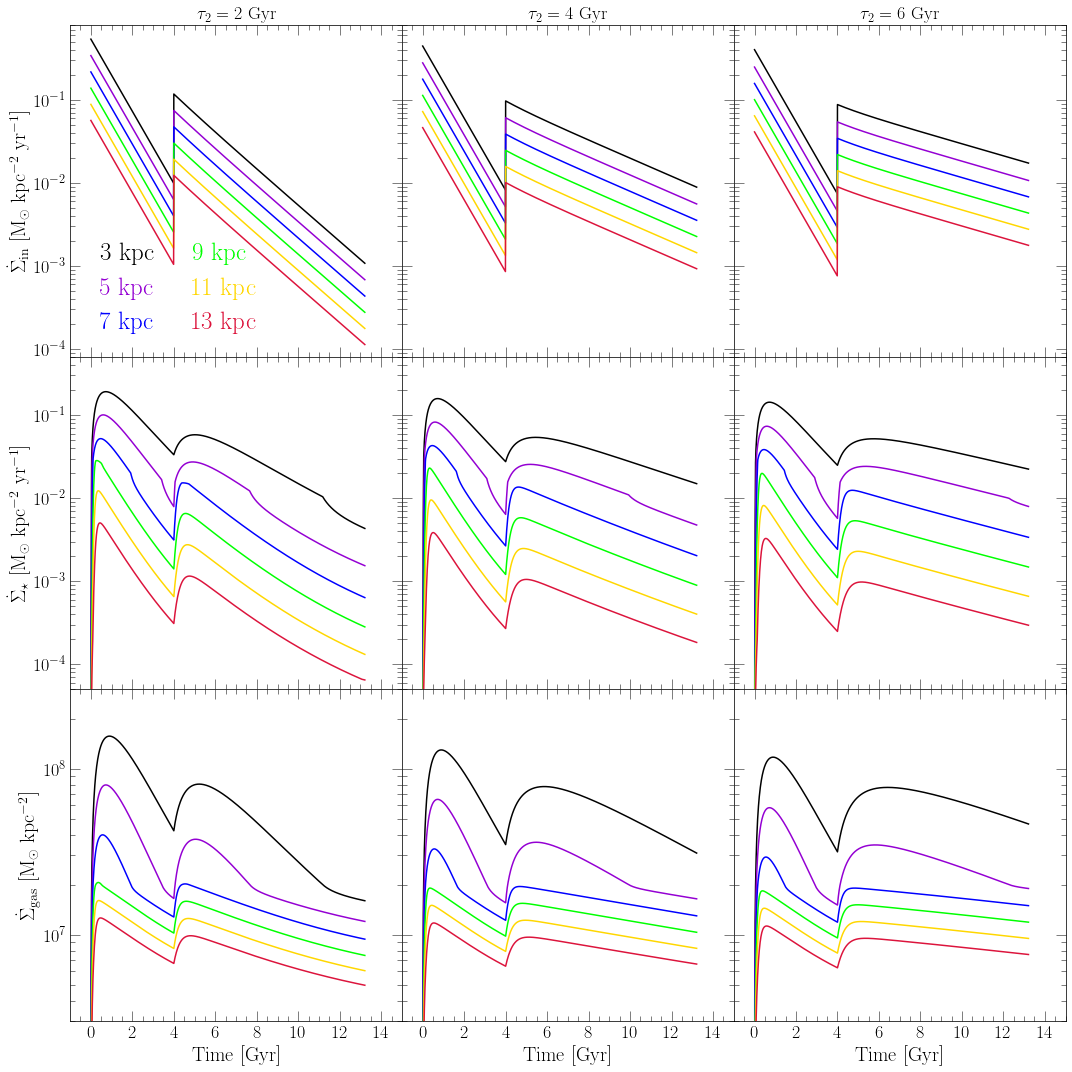

In [7]:
fig = plt.figure(figsize = (15, 15))
axes = [[], [], []]
ylabels = [
    r"$\dot{\Sigma}_\text{in}$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]",
    r"$\dot{\Sigma}_\star$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]",
    r"$\dot{\Sigma}_\text{gas}$ [M$_\odot$ kpc$^{-2}$]"
]
ylim = [[8.e-5, 0.8], [5.e-5, 5.e-1], [3.e6, 3.e8]]
titles = [r"$\tau_2 = 2$ Gyr", r"$\tau_2 = 4$ Gyr", r"$\tau_2 = 6$ Gyr"]
for i in range(len(axes)):
    for j in range(3):
        axes[i].append(fig.add_subplot(331 + 3 * i + j))
        axes[i][j].set_yscale("log")
        axes[i][j].set_xlim([-1, 15])
        axes[i][j].set_ylim(ylim[i])
        axes[i][j].set_xticks([0, 2, 4, 6, 8, 10, 12, 14])
        if j == 0:
            axes[i][j].set_ylabel(ylabels[i])
        else:
            plt.setp(axes[i][j].get_yticklabels(), visible = False)
        if i == len(axes) - 1: axes[i][j].set_xlabel("Time [Gyr]")
        if not i: axes[i][j].set_title(titles[j])

zones = ["zone30", "zone50", "zone70", "zone90", "zone110", "zone130"]
colors = ["black", "darkviolet", "blue", "lime", "gold", "crimson"]
radii = [3, 5, 7, 9, 11, 13]
zone_width = 0.1

for i in range(len(outputs)):
    xvals = outputs[i].zones[zones[0]].history["time"]
    for j in range(len(zones)):
        kwargs = {
            "c": named_colors()[colors[j]]
        }
        if not i: kwargs["label"] = "%g kpc" % (radii[j])
        area = m.pi * ((radii[j] + zone_width)**2 - radii[j]**2)
        yvals = outputs[i].zones[zones[j]].history["ifr"]
        yvals = [_ / area for _ in yvals]
        axes[0][i].plot(xvals, yvals, **kwargs)
        yvals = outputs[i].zones[zones[j]].history["sfr"]
        yvals = [_ / area for _ in yvals]
        axes[1][i].plot(xvals, yvals, **kwargs)
        yvals = outputs[i].zones[zones[j]].history["mgas"]
        yvals = [_ / area for _ in yvals]
        axes[2][i].plot(xvals, yvals, **kwargs)
        
kwargs = {
    "loc": mpl_loc("lower left"),
    "ncol": 2,
    "frameon": False,
    "handlelength": 0,
    "fontsize": 25,
    "columnspacing": 1.2
}
leg = axes[0][0].legend(**kwargs)
fancy_legend(leg, colors)

plt.tight_layout()
plt.subplots_adjust(wspace = 0, hspace = 0)
for ext in ["pdf", "png"]: plt.savefig("./twoinfall_timescales/sfh_t2_var.%s" % (ext))
plt.show()

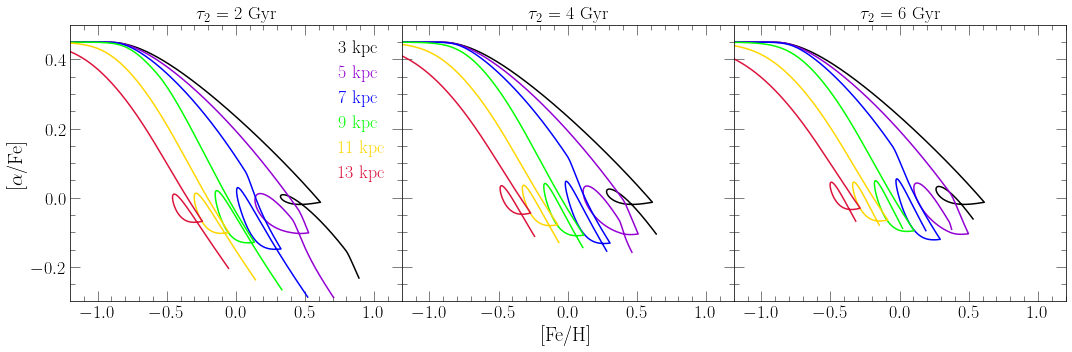

In [3]:
fig = plt.figure(figsize = (15, 5))
axes = []
titles = [r"$\tau_2$ = %d Gyr" % (_) for _ in [2, 4, 6]]
for i in range(3):
    axes.append(fig.add_subplot(131 + i))
    axes[i].set_xlim([-1.2, 1.2])
    axes[i].set_ylim([-0.3, 0.5])
    axes[i].set_title(titles[i])
    if i == 0: 
        axes[i].set_ylabel(r"[$\alpha$/Fe]")
    else:
        plt.setp(axes[i].get_yticklabels(), visible = False)
    if i == 1: axes[i].set_xlabel("[Fe/H]")

# out = outputs[2]

zones = ["zone30", "zone50", "zone70", "zone90", "zone110", "zone130"]
labels = ["3 kpc", "5 kpc", "7 kpc", "9 kpc", "11 kpc", "13 kpc"]
colors = ["black", "darkviolet", "blue", "lime", "gold", "crimson"]


for i in range(len(outputs)):
    for j in range(len(zones)):
        xvals = outputs[i].zones[zones[j]].history["[fe/h]"]
        yvals = outputs[i].zones[zones[j]].history["[o/fe]"]
        kwargs = {
            "c": named_colors()[colors[j]]
        }
        if not i: kwargs["label"] = labels[j]
        axes[i].plot(xvals, yvals, **kwargs)
        
kwargs = {
    "loc": mpl_loc("upper right"),
    "ncol": 1,
    "frameon": False,
    "handlelength": 0
}
leg = axes[0].legend(**kwargs)
fancy_legend(leg, colors)
    
plt.tight_layout()
plt.subplots_adjust(wspace = 0)
for ext in ["pdf", "png"]: plt.savefig("./twoinfall_timescales/tracks_t2_var.%s" % (ext))
plt.show()

/var/folders/1p/lm_h7y810f9_7ygnvr2tjc_w0000gn/T/ipykernel_62887/492006808.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


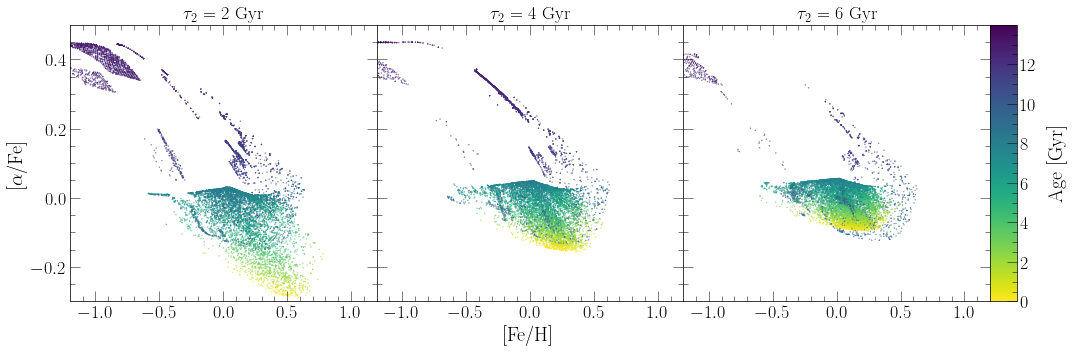

In [4]:
fig = plt.figure(figsize = (15, 5))
axes = []
titles = [r"$\tau_2$ = %d Gyr" % (_) for _ in [2, 4, 6]]
for i in range(3):
    axes.append(fig.add_subplot(131 + i))
    axes[i].set_xlim([-1.2, 1.2])
    axes[i].set_ylim([-0.3, 0.5])
    axes[i].set_title(titles[i])
    if i == 0: 
        axes[i].set_ylabel(r"[$\alpha$/Fe]")
    else:
        plt.setp(axes[i].get_yticklabels(), visible = False)
    if i == 1:
        axes[i].set_xlabel("[Fe/H]")

zone_bounds = [70, 89]
stars = []
for i in range(len(outputs)):
    stars.append(outputs[i].stars.filter(
        "zone_final", ">=", zone_bounds[0]).filter(
        "zone_final", "<=", zone_bounds[1]).filter(
        "abszfinal", "<=", 0.5))
    
for i in range(len(outputs)):
    np.random.seed(seed = 0)
    mtot = sum(stars[i]["mass"])
    mass_fracs = [_ / mtot for _ in stars[i]["mass"]]
    indeces = np.random.choice(list(range(len(stars[i]["mass"]))), p = mass_fracs,
        size = 10000)
    xvals = [stars[i]["[fe/h]"][_] for _ in indeces]
    yvals = [stars[i]["[o/fe]"][_] for _ in indeces]
    age = [stars[i]["age"][_] for _ in indeces]
    kwargs = {
        "c": age,
        "s": 0.1,
        "rasterized": True,
        "cmap": plt.get_cmap("viridis_r"),
        "vmin": 0,
        "vmax": 14
    }
    sc = axes[i].scatter(xvals, yvals, **kwargs)
    
cbar_ax = fig.add_axes([0.92, 0.05, 0.02, 0.95])
cbar = plt.colorbar(sc, cax = cbar_ax, pad = 0, orientation = "vertical")
cbar.set_label("Age [Gyr]", labelpad = 10)
cbar.set_ticks(range(0, 14, 2))

plt.tight_layout()
plt.subplots_adjust(hspace = 0, wspace = 0, right = 0.92)
cbar_ax.set_position([
    axes[-1].get_position().x1,
    axes[-1].get_position().y0,
    0.025,
    axes[-1].get_position().y1 - axes[-1].get_position().y0
])
for ext in ["pdf", "png"]: plt.savefig("./twoinfall_timescales/afe_feh_stars_t2_var.%s" % (ext))
plt.show()

# How do the two-infall model predictions change when the e-folding timescale of the first accretion event varies?

In [5]:
path = "/Volumes/Elements/bimodality-outputs/twoinfall/post-process"
names = [
    "%s/tau1_0p5_tau2_4_onset_4" % (path),
    "%s/tau1_1_tau2_4_onset_4" % (path),
    "%s/tau1_2_tau2_4_onset_4" % (path)
]
outputs = [vice.output(_) for _ in names]
for i in range(len(outputs)):
    extra = np.genfromtxt("%s_analogdata.out" % (outputs[i].name))
    outputs[i].stars["abszfinal"] = [row[-1] for row in extra[:outputs[i].stars.size[0]]]

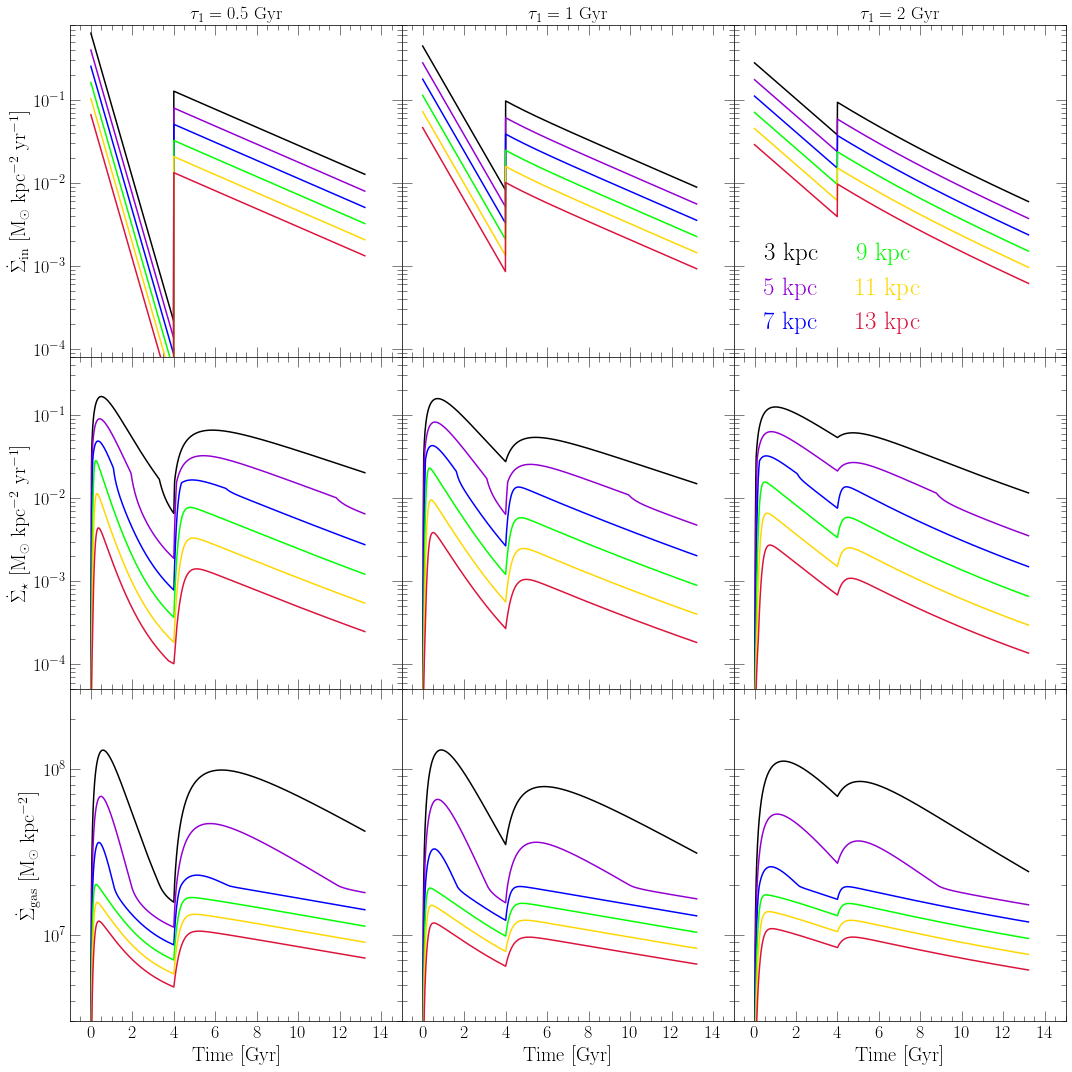

In [11]:
fig = plt.figure(figsize = (15, 15))
axes = [[], [], []]
ylabels = [
    r"$\dot{\Sigma}_\text{in}$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]",
    r"$\dot{\Sigma}_\star$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]",
    r"$\dot{\Sigma}_\text{gas}$ [M$_\odot$ kpc$^{-2}$]"
]
ylim = [[8.e-5, 0.8], [5.e-5, 5.e-1], [3.e6, 3.e8]]
titles = [r"$\tau_1 = 0.5$ Gyr", r"$\tau_1 = 1$ Gyr", r"$\tau_1 = 2$ Gyr"]
for i in range(len(axes)):
    for j in range(3):
        axes[i].append(fig.add_subplot(331 + 3 * i + j))
        axes[i][j].set_yscale("log")
        axes[i][j].set_xlim([-1, 15])
        axes[i][j].set_ylim(ylim[i])
        axes[i][j].set_xticks([0, 2, 4, 6, 8, 10, 12, 14])
        if j == 0:
            axes[i][j].set_ylabel(ylabels[i])
        else:
            plt.setp(axes[i][j].get_yticklabels(), visible = False)
        if i == len(axes) - 1: axes[i][j].set_xlabel("Time [Gyr]")
        if not i: axes[i][j].set_title(titles[j])

zones = ["zone30", "zone50", "zone70", "zone90", "zone110", "zone130"]
colors = ["black", "darkviolet", "blue", "lime", "gold", "crimson"]
radii = [3, 5, 7, 9, 11, 13]
zone_width = 0.1

for i in range(len(outputs)):
    xvals = outputs[i].zones[zones[0]].history["time"]
    for j in range(len(zones)):
        kwargs = {
            "c": named_colors()[colors[j]]
        }
        if i == 2: kwargs["label"] = "%g kpc" % (radii[j])
        area = m.pi * ((radii[j] + zone_width)**2 - radii[j]**2)
        yvals = outputs[i].zones[zones[j]].history["ifr"]
        yvals = [_ / area for _ in yvals]
        axes[0][i].plot(xvals, yvals, **kwargs)
        yvals = outputs[i].zones[zones[j]].history["sfr"]
        yvals = [_ / area for _ in yvals]
        axes[1][i].plot(xvals, yvals, **kwargs)
        yvals = outputs[i].zones[zones[j]].history["mgas"]
        yvals = [_ / area for _ in yvals]
        axes[2][i].plot(xvals, yvals, **kwargs)
        
kwargs = {
    "loc": mpl_loc("lower left"),
    "ncol": 2,
    "frameon": False,
    "handlelength": 0,
    "fontsize": 25,
    "columnspacing": 1.2
}
leg = axes[0][2].legend(**kwargs)
fancy_legend(leg, colors)

plt.tight_layout()
plt.subplots_adjust(wspace = 0, hspace = 0)
for ext in ["pdf", "png"]: plt.savefig("./twoinfall_timescales/sfh_t1_var.%s" % (ext))
plt.show()

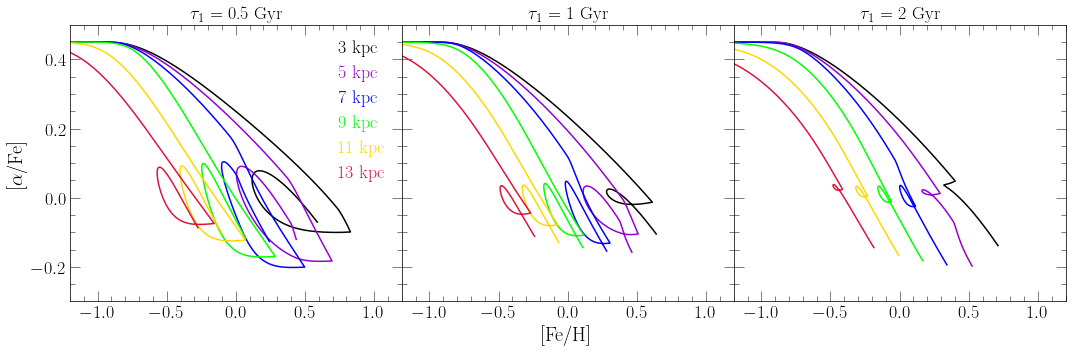

In [6]:
fig = plt.figure(figsize = (15, 5))
axes = []
titles = [r"$\tau_1$ = %g Gyr" % (_) for _ in [0.5, 1, 2]]
for i in range(3):
    axes.append(fig.add_subplot(131 + i))
    axes[i].set_xlim([-1.2, 1.2])
    axes[i].set_ylim([-0.3, 0.5])
    axes[i].set_title(titles[i])
    if i == 0: 
        axes[i].set_ylabel(r"[$\alpha$/Fe]")
    else:
        plt.setp(axes[i].get_yticklabels(), visible = False)
    if i == 1: axes[i].set_xlabel("[Fe/H]")

# out = outputs[2]

zones = ["zone30", "zone50", "zone70", "zone90", "zone110", "zone130"]
labels = ["3 kpc", "5 kpc", "7 kpc", "9 kpc", "11 kpc", "13 kpc"]
colors = ["black", "darkviolet", "blue", "lime", "gold", "crimson"]


for i in range(len(outputs)):
    for j in range(len(zones)):
        xvals = outputs[i].zones[zones[j]].history["[fe/h]"]
        yvals = outputs[i].zones[zones[j]].history["[o/fe]"]
        kwargs = {
            "c": named_colors()[colors[j]]
        }
        if not i: kwargs["label"] = labels[j]
        axes[i].plot(xvals, yvals, **kwargs)
        
kwargs = {
    "loc": mpl_loc("upper right"),
    "ncol": 1,
    "frameon": False,
    "handlelength": 0
}
leg = axes[0].legend(**kwargs)
fancy_legend(leg, colors)
    
plt.tight_layout()
plt.subplots_adjust(wspace = 0)
for ext in ["pdf", "png"]: plt.savefig("./twoinfall_timescales/tracks_t1_var.%s" % (ext))
plt.show()

/var/folders/1p/lm_h7y810f9_7ygnvr2tjc_w0000gn/T/ipykernel_62887/2181799537.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


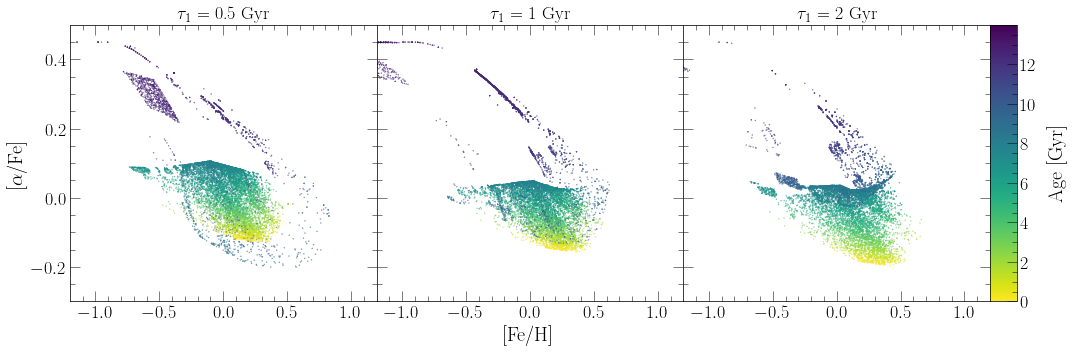

In [7]:
fig = plt.figure(figsize = (15, 5))
axes = []
titles = [r"$\tau_1$ = %g Gyr" % (_) for _ in [0.5, 1, 2]]
for i in range(3):
    axes.append(fig.add_subplot(131 + i))
    axes[i].set_xlim([-1.2, 1.2])
    axes[i].set_ylim([-0.3, 0.5])
    axes[i].set_title(titles[i])
    if i == 0: 
        axes[i].set_ylabel(r"[$\alpha$/Fe]")
    else:
        plt.setp(axes[i].get_yticklabels(), visible = False)
    if i == 1:
        axes[i].set_xlabel("[Fe/H]")

zone_bounds = [70, 89]
stars = []
for i in range(len(outputs)):
    stars.append(outputs[i].stars.filter(
        "zone_final", ">=", zone_bounds[0]).filter(
        "zone_final", "<=", zone_bounds[1]).filter(
        "abszfinal", "<=", 0.5))
    
for i in range(len(outputs)):
    np.random.seed(seed = 0)
    mtot = sum(stars[i]["mass"])
    mass_fracs = [_ / mtot for _ in stars[i]["mass"]]
    indeces = np.random.choice(list(range(len(stars[i]["mass"]))), p = mass_fracs,
        size = 10000)
    xvals = [stars[i]["[fe/h]"][_] for _ in indeces]
    yvals = [stars[i]["[o/fe]"][_] for _ in indeces]
    age = [stars[i]["age"][_] for _ in indeces]
    kwargs = {
        "c": age,
        "s": 0.1,
        "rasterized": True,
        "cmap": plt.get_cmap("viridis_r"),
        "vmin": 0,
        "vmax": 14
    }
    sc = axes[i].scatter(xvals, yvals, **kwargs)
    
cbar_ax = fig.add_axes([0.92, 0.05, 0.02, 0.95])
cbar = plt.colorbar(sc, cax = cbar_ax, pad = 0, orientation = "vertical")
cbar.set_label("Age [Gyr]", labelpad = 10)
cbar.set_ticks(range(0, 14, 2))

plt.tight_layout()
plt.subplots_adjust(hspace = 0, wspace = 0, right = 0.92)
cbar_ax.set_position([
    axes[-1].get_position().x1,
    axes[-1].get_position().y0,
    0.025,
    axes[-1].get_position().y1 - axes[-1].get_position().y0
])
for ext in ["pdf", "png"]: plt.savefig("./twoinfall_timescales/afe_feh_stars_t1_var.%s" % (ext))
plt.show()

# The SFH of a similar model but with the ratios determined by the procedure outlined in twoinfall_parameters.ipynb

In [2]:
name = "/Volumes/Elements/bimodality-outputs/twoinfall/post-process/tau1_1_tau2_4_onset_4_ratiotest"
output = vice.output(name)
extra = np.genfromtxt("%s_analogdata.out" % (output.name))
output.stars["abszfinal"] = [abs(row[-1]) for row in extra[:output.stars.size[0]]]

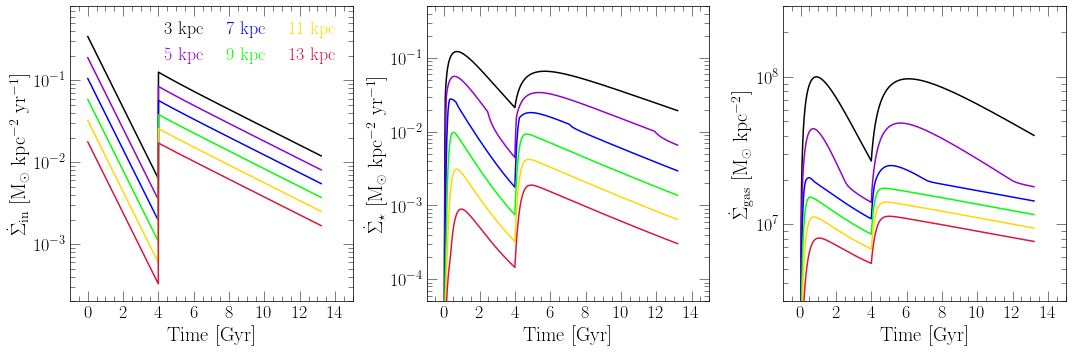

In [8]:
fig = plt.figure(figsize = (15, 5))
axes = []
ylabels = [
    r"$\dot{\Sigma}_\text{in}$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]",
    r"$\dot{\Sigma}_\star$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]",
    r"$\dot{\Sigma}_\text{gas}$ [M$_\odot$ kpc$^{-2}$]"
]
ylim = [[2.e-4, 0.8], [5.e-5, 5.e-1], [3.e6, 3.e8]]
for i in range(3):
    axes.append(fig.add_subplot(131 + i))
    axes[i].set_xlabel("Time [Gyr]")
    axes[i].set_ylabel(ylabels[i])
    axes[i].set_yscale("log")
    axes[i].set_xlim([-1, 15])
    axes[i].set_xticks(list(range(0, 16, 2)))
    axes[i].set_ylim(ylim[i])
    
zones = ["zone30", "zone50", "zone70", "zone90", "zone110", "zone130"]
colors = ["black", "darkviolet", "blue", "lime", "gold", "crimson"]
radii = [3, 5, 7, 9, 11, 13]
zone_width = 0.1

for i in range(len(zones)):
    xvals = output.zones[zones[i]].history["time"]
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": "%d kpc" % (radii[i])
    }
    area = m.pi * ((radii[i] + zone_width)**2 - radii[i]**2)
    yvals = output.zones[zones[i]].history["ifr"]
    yvals = [_ / area for _ in yvals]
    axes[0].plot(xvals, yvals, **kwargs)
    yvals = output.zones[zones[i]].history["sfr"]
    yvals = [_ / area for _ in yvals]
    axes[1].plot(xvals, yvals, **kwargs)
    yvals = output.zones[zones[i]].history["mgas"]
    yvals = [_ / area for _ in yvals]
    axes[2].plot(xvals, yvals, **kwargs)
    
kwargs = {
    "loc": mpl_loc("upper right"),
    "ncol": 3,
    "columnspacing": 1.0,
    "frameon": False,
    "handlelength": 0
}
leg = axes[0].legend(**kwargs)
fancy_legend(leg, colors)

plt.tight_layout()
plt.show()